In [1]:
# Imports 

import numpy as np 
import pandas as pd 
import os 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt 


In [4]:
# Import Dataset 

data = pd.read_csv('./Datasets/titanic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [19]:
# encoding the dataset to integers using an encoder

le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] =  le.fit_transform(data[col])

In [20]:
# fixing missing value 

data.dropna(inplace=True) 

In [21]:
X = data.drop(columns=['2urvived'])
y = data['2urvived']

print(X.shape,y.shape)

(1307, 27) (1307,)


In [22]:
# splitting the data

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y,stratify=y)

# Regular Tree

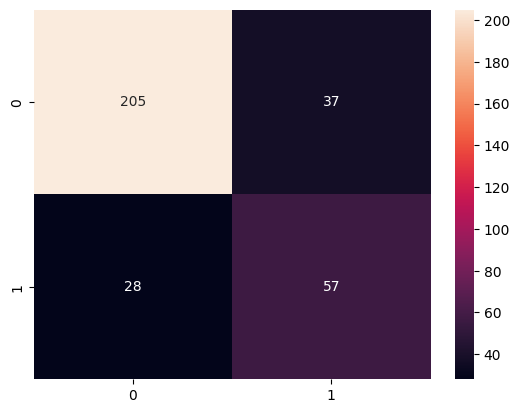

Regular Tree ACC: 0.8012232415902141


In [23]:
clf = tree.DecisionTreeClassifier(random_state = 0)
clf.fit(X_tr,y_tr)

y_pred = clf.predict(X_ts)
cm  = confusion_matrix(y_ts,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

print('Regular Tree ACC:',accuracy_score(y_ts,y_pred))

# Pruned Tree

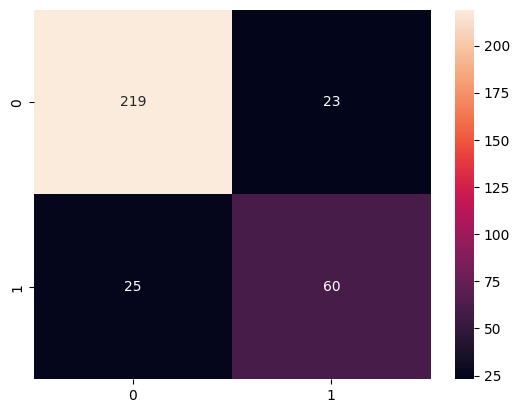

Pruned Tree ACC: 0.8532110091743119


In [25]:
# pruning the tree 

pr_clf = tree.DecisionTreeClassifier(random_state=0, max_depth = 2)
pr_clf.fit(X_tr, y_tr)

y_pred = pr_clf.predict(X_ts)
cm = confusion_matrix(y_ts, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print('Pruned Tree ACC:',accuracy_score(y_ts,y_pred))



# Random Forest

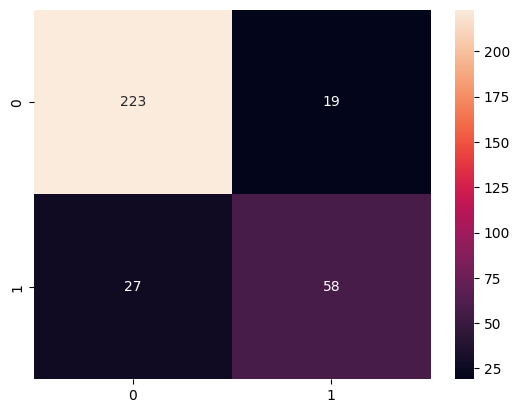

Random Forest ACC: 0.8593272171253823


In [26]:
rf_clf = RandomForestClassifier(random_state=0, n_estimators=10)

rf_clf.fit(X_tr,y_tr)

y_pred = rf_clf.predict(X_ts)
cm = confusion_matrix(y_ts, y_pred)

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print('Random Forest ACC:',accuracy_score(y_ts,y_pred))
